# Business understanding / Data understanding

Gathering and assesing the data

In [0]:
# import the data from insideairbnb
!wget http://data.insideairbnb.com/germany/be/berlin/2019-07-11/data/listings.csv.gz

--2019-10-08 19:43:22--  http://data.insideairbnb.com/germany/be/berlin/2019-07-11/data/listings.csv.gz
Resolving data.insideairbnb.com (data.insideairbnb.com)... 52.216.184.218
Connecting to data.insideairbnb.com (data.insideairbnb.com)|52.216.184.218|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20040246 (19M) [application/x-gzip]
Saving to: ‘listings.csv.gz.2’

listings.csv.gz.2   100%[===================>]  19.11M  17.4MB/s    in 1.1s    

2019-10-08 19:43:24 (17.4 MB/s) - ‘listings.csv.gz.2’ saved [20040246/20040246]



In [0]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

# create dataframe with all details from imported data file
listings_full = pd.read_csv('listings.csv.gz', compression='gzip')

# show the first 5 entries from the listings dataframe
# to get insight about the range of relevant features
listings_full.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1944,https://www.airbnb.com/rooms/1944,20190711004031,2019-07-11,cafeheaven Pberg/Mitte/Wed for the summer 2019,"Private, bright and friendly room. You'd be sh...","The room is very large, private, cozy, bright,...","Private, bright and friendly room. You'd be sh...",none,near all the trendy cafés and flea markets and...,"Please check-in by 10pm, and we can't accept c...",There is ample street parking. We are near 2 ...,"Your room, the bathroom and the kitchen, and o...",I'll be traveling a lot in the summer and not ...,Please do not use the wireless Internet access...,NaN,NaN,https://a0.muscache.com/im/pictures/107924758/...,NaN,2164,https://www.airbnb.com/users/show/2164,Lulah,2008-08-16,"Berlin, Berlin, Germany",I'm an American artist living in Berlin for 24...,a few days or more,40%,NaN,f,https://a0.muscache.com/im/users/2164/profile_...,https://a0.muscache.com/im/users/2164/profile_...,Wedding,0.0,0.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Berlin, Berlin, Germany",Wedding,Brunnenstr. Nord,...,$10.00,120,120,120,120,120,120,120.0,120.0,7 months ago,t,29,59,89,364,2019-07-11,18,1,2013-09-07,2018-11-11,82.0,9.0,8.0,9.0,9.0,9.0,8.0,t,NaN,NaN,f,f,moderate,f,f,1,0,1,0,0.25
1,2015,https://www.airbnb.com/rooms/2015,20190711004031,2019-07-11,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Jan,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within a few hours,88%,NaN,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,5.0,5.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,...,$28.00,4,1125,3,44,1125,1125,12.8,1125.0,a week ago,t,0,0,0,0,2019-07-11,126,22,2016-04-11,2019-07-04,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,moderate,f,f,4,4,0,0,3.18
2,3176,https://www.airbnb.com/rooms/3176,20190711004031,2019-07-11,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzpla

In [0]:
# display a list of all features
listings_full.columns.to_list()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [0]:
# get information about all numeric features
listings_full.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.439500e+04,2.439500e+04,0.0,0.0,0.0,2.439500e+04,0.0,24370.000000,24370.000000,24395.000000,24395.000000,24395.000000,24365.000000,24377.000000,24360.000000,434.000000,24395.000000,24395.000000,24395.000000,24395.000000,24395.000000,24395.000000,24395.000000,24395.000000,24395.000000,24395.000000,24395.000000,24395.000000,24395.000000,24395.000000,24395.000000,19476.000000,19450.000000,19453.000000,19432.000000,19448.000000,19433.000000,19430.000000,0.0,24395.000000,24395.000000,24395.000000,24395.000000,19966.000000
mean,1.877282e+07,2.019071e+13,NaN,NaN,NaN,6.519884e+07,NaN,3.160074,3.160074,52.509952,13.405914,2.673540,1.099036,1.163064,1.642529,490.504608,1.348637,6.960115,606.915474,6.765854,7.253085,606.904243,610.371429,7.007924,609.277311,3.864357,9.069440,15.558803,71.265095,19.648576,7.734987,94.671544,9.686941,9.343597,9.730033,9.750360,9.571759,9.426917,NaN,2.120476,1.168272,0.805657,0.146546,1.095360
std,1.051497e+07,9.804888e-01,NaN,NaN,NaN,7.222803e+07,NaN,32.288721,32.288721,0.031244,0.058645,1.567874,0.347554,0.666760,1.228604,516.180336,0.861573,24.789947,642.109753,23.922118,25.033204,664.259473,677.543949,24.462203,677.401367,7.271298,15.524471,24.670145,111.062350,41.482242,15.315937,7.503871,0.729098,1.019635,0.696335,0.677527,0.736348,0.829041,NaN,4.324981,3.295311,1.876480,2.144577,1.516829
min,1.944000e+03,2.019071e+13,NaN,NaN,NaN,2.058000e+03,NaN,0.000000,0.000000,52.345800,13.097180,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,9.584722e+06,2.019071e+13,NaN,NaN,NaN,1.016728e+07,NaN,1.000000,1.000000,52.489115,13.375350,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,20.000000,2.000000,2.000000,20.000000,20.000000,2.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,92.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.150000
50%,1.957983e+07,2.019071e+13,NaN,NaN,NaN,3.540754e+07,NaN,1.000000,1.000000,52.509290,13.416470,2.000000,1.000000,1.000000,1.000000,431.000000,1.000000,3.000000,1124.000000,2.000000,3.000000,1124.000000,1124.000000,3.000000,1124.000000,0.000000,0.000000,0.000000,3.000000,5.000000,1.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,1.000000,0.000000,0.490000
75%,2.759866e+07,2.019071e+13,NaN,NaN,NaN,9.940649e+07,NaN,2.000000,2.000000,52.532770,13.439345,3.000000,1.000000,1.000000,2.000000,753.000000,1.000000,4.000000,1125.000000,4.000000,5.000000,1125.000000,1125.000000,4.000000,1125.000000,4.000000,12.000000,24.000000,110.000000,17.000000,8.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,1.000000,0.000000,1.430000
max,3.659933e+07,2.019071e+13,NaN,NaN,NaN,2.749825e+08,NaN,1737.000000,1737.000000,52.651670,13.757640,16.000000,8.500000,10.000000,22.000000,4639.000000,16.000000,1000.000000,50000.000000,1000

**QUESTIONS TO EXPLORE**
1. How does cancellation policy influence utilization?
2. What factors influence review_scores_ratings?
3. How does the neighbourhood influence the listing price? What factors influence price the most?


# Data preperation / cleaning

In [0]:
# drop all columns and rows where all values are NaN
listings_full.dropna(how='all', axis=1, inplace=True) # drop cols
listings_full.dropna(how='all', axis=0, inplace=True) # drop rows

# identify columns that contain the same value for all rows amd drop them
listings_full = listings_full[listings_full.columns[listings_full.nunique(dropna=False) != 1]]
listings_full.shape

(24395, 93)

In [0]:
# Drop columns that are not used for the analysis
listings_full.drop(['listing_url', 'picture_url', 'host_url', 'zipcode', 'smart_location', 'host_listings_count', 'host_total_listings_count', 'host_neighbourhood', 'host_verifications',
                    'host_name', 'host_picture_url', 'host_thumbnail_url', 'name', 'summary', 'space', 'description', 'notes', 'neighborhood_overview',
                    'transit', 'access', 'interaction', 'house_rules', 'host_about', 'city', 'state', 'market', 'street', 'host_listings_count', 
                    'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
                    'is_location_exact',  'host_response_time', 'host_response_rate', 'calendar_updated', 'property_type', 'amenities'], axis=1, inplace=True)
listings_full.shape

(24395, 57)

In [0]:
# drop cols with more than 70% missing values
listings_full = listings_full.loc[:, listings_full.isnull().mean() < .7]
listings_full.shape

(24395, 53)

In [0]:
# display a list of all remaining features
listings_full.columns.to_list()

['id',
 'host_id',
 'host_since',
 'host_location',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'requires_license',
 'instant_bookable',
 'cancell

**Handling price columns**

In [0]:
# identify price columns
price_columns = ['price', 'cleaning_fee', 'extra_people', 'security_deposit']
listings_full[price_columns].head()

,price,cleaning_fee,extra_people,security_deposit
0,$21.00,$0.00,$10.00,$0.00
1,$60.00,$30.00,$28.00,$250.00
2,$90.00,$50.00,$20.00,$200.00
3,$28.00,$30.00,$18.00,$250.00
4,$125.00,$39.00,$0.00,$0.00


In [0]:
# price columns are text datatypes and have to be reformatted
for col in price_columns:
    # remove "$" and "," chars
    listings_full[col] = listings_full[col].replace({'\$':''}, regex = True)
    listings_full[col] = listings_full[col].replace({',':''}, regex = True)

    # convert price to float
    listings_full[col] = listings_full[col].astype(float)

listings_full[price_columns].head()

,price,cleaning_fee,extra_people,security_deposit
0,21.0,0.0,10.0,0.0
1,60.0,30.0,28.0,250.0
2,90.0,50.0,20.0,200.0
3,28.0,30.0,18.0,250.0
4,125.0,39.0,0.0,0.0


**Handling boolean columns**

In [0]:
# convert the values "t" and "f" to 1 and 0 in the relevant columns
def convert_true_false(x):
    if x == "t":
        return 1
    elif x == "f":
        return 0
    else:
        return x

# define the columns containing boolean values
boolean_columns = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 
                   'requires_license', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']

# replace NaN string with NaN and fill all with 0
listings_full[boolean_columns] = listings_full[boolean_columns].replace('NaN', np.nan).fillna(0)

# convert t and f to 1 and 0 and change datatype to int
for col in boolean_columns:
    listings_full[col] = listings_full[col].apply(convert_true_false)
    listings_full[col] = listings_full[col].astype(np.int64)

# check if NaN values still in the bool columns
listings_full[boolean_columns].isnull().values.any()

False

In [0]:
# check if the only values left in the boolean columns are 0 and 1
np.unique(listings_full[boolean_columns].values)

array([0, 1])

**Handling NaN values**

In [0]:
# checking for NaN values and their rate of occurence
def show_nan_percentage(df):
    '''
    INPUT - df - pandas dataframe 
            
    OUTPUT - table with nan_value percentages greater than 0
    '''   
    nan_value_percentage = (df.isna().sum()/listings_full.shape[0]).sort_values(ascending = False)

    # return only the columns containing nan values
    return nan_value_percentage[nan_value_percentage > 0.0]

show_nan_percentage(listings_full)

security_deposit               0.393728
cleaning_fee                   0.297028
review_scores_value            0.203525
review_scores_checkin          0.203443
review_scores_location         0.203402
review_scores_communication    0.202787
review_scores_accuracy         0.202705
review_scores_cleanliness      0.202582
review_scores_rating           0.201640
last_review                    0.181554
reviews_per_month              0.181554
first_review                   0.181554
host_location                  0.004919
beds                           0.001435
bathrooms                      0.001230
host_since                     0.001025
bedrooms                       0.000738
dtype: float64

In [0]:
# create new boolean feature 'has review' and set all non NaNs to 1
listings_full['has_review'] = listings_full['first_review'].copy()
listings_full.loc[listings_full['has_review'].notnull(), 'has_review'] = 1

listings_full['has_review'].value_counts(dropna=False)

1.0    19966
NaN     4429
Name: has_review, dtype: int64

In [0]:
# NaN values in the following columns are assumed to equal 0 if not filled
nan_zero_cols = ['security_deposit', 'cleaning_fee', 'reviews_per_month', 'last_review', 'first_review', 'has_review']

# reformat NaN values and replace them with 0
for col in nan_zero_cols:
  listings_full[col] = listings_full[col].replace('NaN', np.nan).fillna(0)

# drop the observations with low percentage of NaN values
listings_full = listings_full.dropna(axis=0, subset=['host_location', 'beds', 'bathrooms', 'bedrooms'])

# checking for NaN values and their rate of occurence
show_nan_percentage(listings_full)

review_scores_value            0.202256
review_scores_checkin          0.202173
review_scores_location         0.202132
review_scores_communication    0.201512
review_scores_accuracy         0.201430
review_scores_cleanliness      0.201306
review_scores_rating           0.200397
dtype: float64

In [0]:
# as has_review doesnt contain strings anymore we can convert it to int
listings_full['has_review'] = listings_full['has_review'].astype(int)

listings_full[nan_zero_cols].head()

,security_deposit,cleaning_fee,reviews_per_month,last_review,first_review,has_review
0,0.0,0.0,0.25,2018-11-11,2013-09-07,1
1,250.0,30.0,3.18,2019-07-04,2016-04-11,1
2,200.0,50.0,1.18,2019-06-27,2009-06-20,1
3,250.0,30.0,0.38,2019-05-31,2013-08-12,1
4,0.0,39.0,1.08,2018-10-18,2010-02-15,1


In [0]:
# the only remaining NaN values are review scores, and are going to be set to 0
listings_full = listings_full.fillna(0)
show_nan_percentage(listings_full)

Series([], dtype: float64)

**Encoding Features for ML model**

In [0]:
# Copy all object series from the dataframe to explore the features to be encoded
cat_listings = listings_full.select_dtypes(include=['object']).copy()
cat_listings.head()

,host_since,host_location,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,room_type,bed_type,first_review,last_review,cancellation_policy
0,2008-08-16,"Berlin, Berlin, Germany",Wedding,Brunnenstr. Nord,Mitte,Private room,Real Bed,2013-09-07,2018-11-11,moderate
1,2008-08-18,"Key Biscayne, Florida, United States",Mitte,Brunnenstr. Süd,Mitte,Entire home/apt,Real Bed,2016-04-11,2019-07-04,moderate
2,2008-10-19,"Coledale, New South Wales, Australia",Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow,Entire home/apt,Real Bed,2009-06-20,2019-06-27,strict_14_with_grace_period
3,2008-11-07,"Berlin, Berlin, Germany",Schöneberg,Schöneberg-Nord,Tempelhof - Schöneberg,Private room,Pull-out Sofa,2013-08-12,2019-05-31,strict_14_with_grace_period
4,2009-05-07,"Berlin, Berlin, Germany",Friedrichshain,Frankfurter Allee Süd FK,Friedrichshain-Kreuzberg,Entire home/apt,Real Bed,2010-02-15,2018-10-18,moderate


In [0]:
# drop other variables not to be encoded
cat_listings.drop(['host_since', 'host_location', 'first_review', 'last_review', 'neighbourhood', 'neighbourhood_cleansed'], axis=1, inplace=True)
cat_listings.head()

,neighbourhood_group_cleansed,room_type,bed_type,cancellation_policy
0,Mitte,Private room,Real Bed,moderate
1,Mitte,Entire home/apt,Real Bed,moderate
2,Pankow,Entire home/apt,Real Bed,strict_14_with_grace_period
3,Tempelhof - Schöneberg,Private room,Pull-out Sofa,strict_14_with_grace_period
4,Friedrichshain-Kreuzberg,Entire home/apt,Real Bed,moderate


In [0]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=False, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [0]:
# encode the selected columns
listings_encoded = create_dummy_df(listings_full, cat_listings.columns, dummy_na=False)
listings_encoded.head()

,id,host_id,host_since,host_location,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,has_review,neighbourhood_group_cleansed_Charlottenburg-Wilm.,neighbourhood_group_cleansed_Friedrichshain-Kreuzberg,neighbourhood_group_cleansed_Lichtenberg,neighbourhood_group_cleansed_Marzahn - Hellersdorf,neighbourhood_group_cleansed_Mitte,neighbourhood_group_cleansed_Neukölln,neighbourhood_group_cleansed_Pankow,neighbourhood_group_cleansed_Reinickendorf,neighbourhood_group_cleansed_Spandau,neighbourhood_group_cleansed_Steglitz - Zehlendorf,neighbourhood_group_cleansed_Tempelhof - Schöneberg,neighbourhood_group_cleansed_Treptow - Köpenick,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,1944,2164,2008-08-16,"Berlin, Berlin, Germany",0,1,1,Wedding,Brunnenstr. Nord,52.54425,13.39749,1,1.0,1.0,1.0,21.0,0.0,0.0,1,10.0,120,120,120,120,120,120,120.0,120.0,29,59,89,364,18,1,2013-09-07,2018-11-11,82.0,9.0,8.0,9.0,9.0,9.0,8.0,1,0,0,0,1,0.25,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
1,2015,2217,2008-08-18,"Key Biscayne, Florida, United States",1,1,1,Mitte,Brunnenstr. Süd,52.53454,13.40256,3,1.0,1.0,2.0,60.0,250.0,30.0,1,28.0,4,1125,3,44,1125,1125,12.8,1125.0,0,0,0,0,126,22,2016-04-11,2019-07-04,93.0,10.0,9.0,10.0,10.0,10.0,9.0,1,0,0,0,4,3.18,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
2,3176,3718,2008-10-19,"Coledale, New South Wales, Australia",0,1,1,Prenzlauer Berg,Prenzlauer Berg Südwest,52.53500,13.41758,4,1.0,1.0,2.0,90.0,200.0,50.0,2,20.0,62,1125,62,62,1125,1125,62.0,1125.0,0,0,4,279,145,2,2009-06-20,2019-06-27,93.0,9.0,9.0,9.0,9.0,10.0,9.0,1,0,0,0,1,1.18,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
3,3309,4108,2008-11-07,"Berlin, Berlin, Germany",0,1,0,Schöneberg,Schöneberg-Nord,52.49885,13.34906,1,1.0,1.0,1.0,28.0,250.0,30.0,1,18.0,7,35,7,7,35,35,7.0,35.0,0,0,9,284,27,3,2013-08-12,2019-05-31,89.0,9.0,9.0,9.0,10.0,9.0,9.0,1,0,0,0,1,0.38,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,6883,16149,2009-05-07,"Berlin, Berlin, Germany",0,1,1,Friedrichshain,Frankfurter Allee Süd FK,52.51171,13.45477,2,1.0,1.0,1.0,125.0,0.0,39.0,1,0.0,3,90,3,3,90,90,3.0,90.0,0,0,0,0,124,6,2010-02-15,2018-10-18,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0,0,1,1,1.08,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0


# Analysis

**Analysis of cancellation policy**

*How does cancellation policy influence utilization? What are other insights we can get from exploring different features in relation to cancellation policy?*

In [0]:
# explore the possible cancelation policies and how often they are provided
listings_full.cancellation_policy.value_counts()

flexible                       9601
moderate                       7364
strict_14_with_grace_period    7131
super_strict_30                  63
super_strict_60                  41
strict                            2
Name: cancellation_policy, dtype: int64

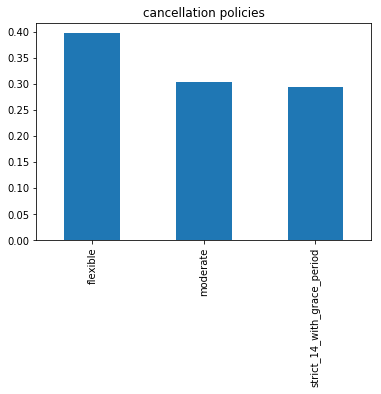

In [0]:
# eliminate the outliers and create a separate dataframe
listings_policy = listings_full.drop(listings_full[(listings_full['cancellation_policy'] == 'super_strict_30')].index)
listings_policy.drop(listings_full[(listings_full['cancellation_policy'] == 'super_strict_60')].index, inplace=True)
listings_policy.drop(listings_full[(listings_full['cancellation_policy'] == 'strict')].index, inplace=True)

# visualize the relation between the different policies
count_vals = listings_policy.cancellation_policy.value_counts()
(count_vals/listings_full.shape[0]).plot(kind="bar");
plt.title("cancellation policies");

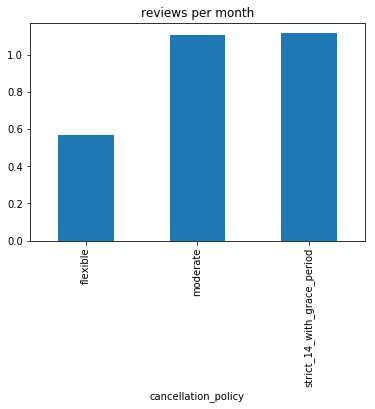

In [0]:
# to explore the influence of cancellation policy on utilization,
# the average reviews per month are shown based on cancellation policy
test = listings_policy.groupby(['cancellation_policy'])['reviews_per_month'].mean()
test.plot(kind="bar")
plt.title("reviews per month");

In [0]:
# in order to gain more insight what might influence cancellation policy,
# it is put into perspective with superhost and review scores
listings_policy.groupby(['cancellation_policy'])['host_is_superhost', 'review_scores_rating', 'price'].mean()

,host_is_superhost,review_scores_rating,price
cancellation_policy,,,
flexible,0.085824,63.974065,70.049370
moderate,0.210891,85.272406,64.606735
strict_14_with_grace_period,0.212593,81.673678,76.814051


In [0]:
# explore if a pricing pattern can be found in terms of median
listings_policy.groupby(['cancellation_policy'])['price'].median()

cancellation_policy
flexible                       40.0
moderate                       50.0
strict_14_with_grace_period    60.0
Name: price, dtype: float64

As shown above there is a connection between cancellation policy and reviews per month. It is shown that the average number of reviews is higher for unflexible cancellation policies. This indicates that to much freedom in cancellation can lead to lower utilization. Furthermore superhosts are more likely to provide unflexible cancellation options, which could indicate their preference for predictability of their utilization. Listings with moderate or strict cancellation policy also tend to have significantly higher average ratings and a higher median price, which could be another insight to explore further.

**Analysis of review scores**

*What factors influence review_scores_ratings?*

In [0]:
# different review scores with percentage of occurence
listings_full.review_scores_value.value_counts(normalize=True, dropna=False)

10.0    0.446699
9.0     0.280307
0.0     0.202256
8.0     0.054624
6.0     0.007189
7.0     0.005950
2.0     0.001240
4.0     0.001198
5.0     0.000413
3.0     0.000124
Name: review_scores_value, dtype: float64

The above information indicates that good ratings for value are pretty common for listings in berlin. You can savely ignore the 20% zero ratings as they indicate that certain listings simply didnt get a review instead of a very bad review. Therefore it can be concluded that almost all listings in Berlin have pretty high value ratings of 8 or above. 

In [0]:
# it is assumed that certain neighbourhoods lead ot better reviews
# to get an overview the following description is shown
listings_full.groupby(['neighbourhood_group_cleansed'])['review_scores_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group_cleansed,,,,,,,,
Charlottenburg-Wilm.,1747.0,72.620492,40.287195,0.0,80.0,94.0,100.0,100.0
Friedrichshain-Kreuzberg,5810.0,77.204303,37.530346,0.0,84.0,96.0,100.0,100.0
Lichtenberg,777.0,71.880309,40.743190,0.0,60.0,94.0,100.0,100.0
Marzahn - Hellersdorf,140.0,73.864286,39.928751,0.0,80.0,95.0,99.0,100.0
Mitte,5048.0,75.477615,38.039402,0.0,80.0,94.0,99.0,100.0
Neukölln,3724.0,75.477175,38.911924,0.0,80.0,95.0,100.0,100.0
Pankow,3796.0,77.221286,37.609799,0.0,86.0,96.0,100.0,100.0
Reinickendorf,300.0,70.980000,41.502785,0.0,45.0,95.0,99.0,100.0
Spandau,134.0,67.761194,42.652148,0.0,0.0,92.5,98.0,100.0


The above table indicates that there are different average review scores depending on neighborhood. At a closer look we can see that this is not really the case as the median as well as the upper quantile review scores are identical for all neighborhood groups. This indicates that the mean is heavily influenced by not yet reviewed listings or outliers. Therefore the neighboorhoud should have little influence on review ratings.

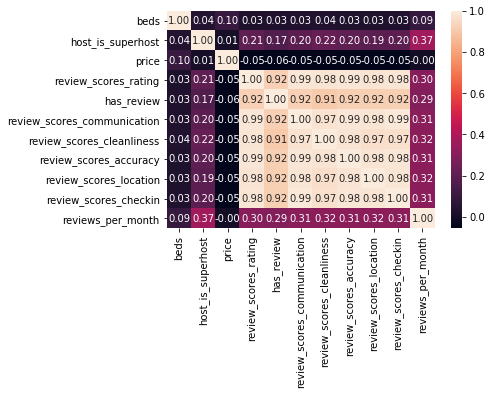

In [0]:
# create a correlation heatmap to explore possible connections
sns.heatmap(listings_full[['beds', 'host_is_superhost', 'price', 'review_scores_rating', 'has_review', 'review_scores_communication', 'review_scores_cleanliness', 'review_scores_accuracy', 'review_scores_location', 'review_scores_checkin', 'reviews_per_month']].corr(), annot=True, fmt='.2f');

As shown above there is no review part that deviates significantly to the overall ratings score, which indicates that all categories are of great relevance for the guests. No other meaningfull correlations are found, despite a small connection between superhosts and good review scores. As can be expected, superhosts offer high value for their customers because of there experience in the field and therefore get better average reviews.


In order to get more information out of the review scores, we will groop the data and have a look at the distribution of ratings.

In [0]:
# group the number of review scores based on rating ranges
listings_policy.groupby(pd.cut(listings_policy["review_scores_rating"], np.arange(60, 100.0+5, 5)))['review_scores_rating'].count()

review_scores_rating
(60.0, 65.0]         7
(65.0, 70.0]        85
(70.0, 75.0]        92
(75.0, 80.0]       933
(80.0, 85.0]       396
(85.0, 90.0]      2104
(90.0, 95.0]      3956
(95.0, 100.0]    11514
Name: review_scores_rating, dtype: int64

The above shows that scores below 75 are very unlikely and most listings have scores above 95. Next we will have a look at how these rating scores influence other important features.

In [0]:
# show the averages of certain main features
listings_policy.groupby(pd.cut(listings_policy["review_scores_rating"], np.arange(75, 100.0+5, 5)))['reviews_per_month', 'host_is_superhost', 'price'].mean()

,reviews_per_month,host_is_superhost,price
review_scores_rating,,,
"(75.0, 80.0]",0.341350,0.013934,65.485531
"(80.0, 85.0]",1.265934,0.015152,65.845960
"(85.0, 90.0]",1.124919,0.022814,59.848859
"(90.0, 95.0]",1.463225,0.138524,64.775025
"(95.0, 100.0]",1.070609,0.272277,65.789995


The above table shows that there is a significant gap in reviews per month if ratings fall below the threshold of 80. Also the rating range of 90.0 to 95.0 yields to highest average review amount per month, which could be subject for further analysis. While superhosts tend to have higher average ratings there is no clear pattern in terms of average price between the review score ranges.

**Analysis of price**

*What factors influence price the most?*

It is expected that the neighbourhood group is an important facotr in determining the price. Therefore we start our analysis by exploring different price metrics in relation to neighbourhood the listings are located at.

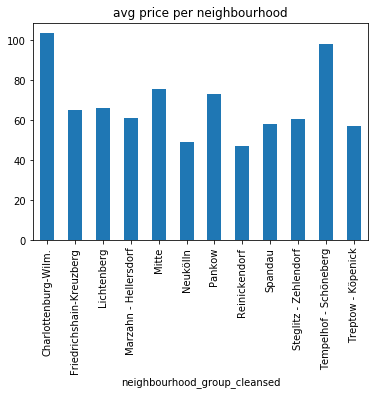

In [0]:
# Checking the influence of neighborhood_group on average price
listings_full.groupby(['neighbourhood_group_cleansed'])['price'].mean().plot(kind="bar", title="avg price per neighbourhood")

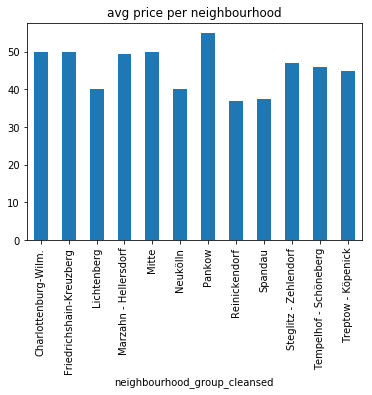

In [0]:
# see how the median compares to the mean above
listings_full.groupby(['neighbourhood_group_cleansed'])['price'].median().plot(kind="bar", title="avg price per neighbourhood")

In [0]:
# group the price by neighbourhood and get detailed information
listings_full.groupby(['neighbourhood_group_cleansed'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group_cleansed,,,,,,,,
Charlottenburg-Wilm.,1747.0,103.677733,452.064831,10.0,35.00,50.0,84.00,6000.0
Friedrichshain-Kreuzberg,5810.0,65.274871,130.982928,0.0,35.00,50.0,75.00,8600.0
Lichtenberg,777.0,65.962677,338.360983,9.0,26.00,40.0,57.00,8000.0
Marzahn - Hellersdorf,140.0,61.228571,56.999097,0.0,27.00,49.5,70.00,500.0
Mitte,5048.0,75.539818,103.170429,1.0,33.00,50.0,85.00,2500.0
Neukölln,3724.0,49.301020,35.174900,9.0,30.00,40.0,60.00,500.0
Pankow,3796.0,72.999210,136.996455,9.0,37.00,55.0,80.00,5000.0
Reinickendorf,300.0,46.963333,34.354078,9.0,27.00,37.0,50.00,350.0
Spandau,134.0,58.298507,51.599095,11.0,28.25,37.5,73.75,290.0


The comparison above indicates that the mean price in some districts is heavily influenced by some significantly deviating objects. It is interesting that the median price is hardly different between the pricier districts. This could lead to the assumption that even properties in normally cheaper districts can be put on airBnB for a higher price. In order to explore the possibility of predicting the price a machine learning model is implemented in the following section

# Model

**Price analysis**

In [0]:
# copy numeric features to a separate dataframe for use in our ml model
listings_numeric = listings_encoded.select_dtypes([np.number])
listings_numeric.columns

Index(['id', 'host_id', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'instant_bookable', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_pe

In [0]:
# drop potentially irrelevant columns
listings_numeric = listings_numeric.drop(['id', 'host_id', 'latitude', 'longitude', 'cancellation_policy_super_strict_30', 'cancellation_policy_super_strict_60'], axis=1)

In [0]:
# Creating a ML model
X = listings_numeric.drop(['price'], axis=1)
y = listings_numeric['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 34)

# instanciate
lm_model = LinearRegression(normalize=True)

# fit training
lm_model.fit(X_train, y_train)

# predict test data
y_test_preds = lm_model.predict(X_test) # Predictions here
r2_test = r2_score(y_test, y_test_preds) # Rsquared here

# Print r to see result
r2_test

# score

0.07451122123637066

The r2 score close to zero indicates that only a small portion of the deviation can be explained by the linear regression model. The predictions of prices is therefore not very reliable.